# 16-2. 합성곱 신경망(CNN)

## CNN(Convolution Neural Network, 합성곱 신경망)

CNN은 합성곱(Convolution) 연산을사용하는 ANN(Artificial Neural Network)의 한 종류이다. Convolution을 사용하면 3차원 데이터의 공간적 정보를 유지한 채 다음 레이어로 보낼 수 있다. 대표적인 CNN 으로는 LeNet(1998)과 AlexNet(2012)이 있으며, VGG, GoogLeNet, ResNet등은 층을 더 깊게 쌓은 CNN 기반의 DNN(Depp Neural Network, 심층신경망)이다.

---
Tensorflow에는 합성곱 신경망 (Convolution Neural Network)를 구성하기 위한 여러 함수들을 제공한다.
 
### Convolution
 
--- 
Tensorflow 합성곱 함수
- keras.layers.Conv2D(filters, kernal_size, strides, padding, activation)(image) 
    - filters : output filter의 개수
    - kernel : Convolution을 위한 kernel
    - stride : 정수 및 튜플, 리스트 형태의 값 ex) [2,2]
    - padding : SAME / VALID
    - activation : 활성화 함수
    - image : 입력 영상
  
---  
 
### Stride
 
Stride를 통해 이미지 픽셀을 건너뛰며 합성곱 연산을 진행한다. 이를 통해 이미지의 차원을 줄일 수 있다.
- Outputsize=(Image−Kernel)/stride + 1

### Padding
 
Kernel이 이미지 경계를 벗어나지 않도록 하거나 경우에 따라 경계를 벗어나는 경우 모자라는 부분을 채워준다.

- SAME : 합성곱 입력과 출력을 같게 합니다.
- VALID : Kernel이 이미지 경계를 벗어나지 않도록 합니다.
  
--- 
관련 링크
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

https://github.com/deeplearningzerotoall/TensorFlow/blob/master/lab-11-0-cnn-basics-keras-eager.ipynb
  
---

Image shape :  (1, 3, 3, 1)
Kernel shape :  (2, 2, 1, 1)


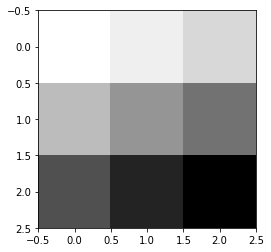

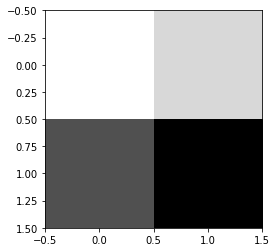

In [1]:
# [Convolution Layer]

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

def Visualize(image, x, y):
    plt.imshow(image.reshape(x,y), cmap ='Greys')
    plt.show()
    

# 임의의 3 x 3 x 1 영상을 하나 만들어줍니다. # 1이니까 [1] 이런식으로 하나만 넣어줘야함.
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)

# 합성곱 연산을 위해 임의의 2 x 2 x 1 커널을 하나 만들어줍니다.
kernel = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


# 이미지 Shape 출력 : (num of image, width, height, channel)
print('Image shape : ', image.shape)
# 커널 Shape 출력 : (width, height, channel, num of kernel)
print('Kernel shape : ', kernel.shape)
# tf.nn.conv2d에 넣기 위해 이미지와 커널의 Shape을 위와 같이 만들었습니다.


# Gray 이미지 출력
Visualize(image, 3 ,3)

kernel_init = tf.constant_initializer(kernel)
# Convolution Layer 선언
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',kernel_initializer=kernel_init)(image)
Visualize(conv2d.numpy(), 2,2)

### Max Pooling Layer
 
앞에서 합성곱 연산이 어떻게 이루어지는지 확인했다.
 
전체적인 CNN (Convolution Neural Network)를 만들기 위해서는 몇가지 추가 기능이 더 필요하다.
 
이번에는 Max Pooling Layer를 통해 영상이 어떻게 축소되는지 확인해보자.
 
#### Max Pooling layer
 
Max Pooling Layer는 일반적으로 Convolution Layer 뒤에 붙여 Conv layer의 결과(Feature Map)를 축소시키는데 사용한다.
 
M x N 크기의 Pooling Filter를 적용하고, 그 안에서 가장 큰 값을 추출한다.
 
Pooling 작업을 통해
- Feature map의 사이즈를 줄여 연산량을 줄임.
- Feature의 개수가 줄어들기 때문에 Overfitting 방지
  
의 효과를 얻을 수 있다.
 
--- 
- keras.layers.MaxPool2D(pool_size, strides, padding)
    - pool_size : Pooling filter의 크기
    - strides : Filter를 적용할 간격
    - padding : SAME or VALID
  
--- 

(1, 2, 2, 1)
[[[[ 5.]
   [ 7.]]

  [[ 8.]
   [10.]]]]


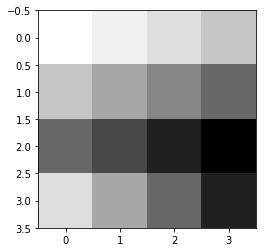

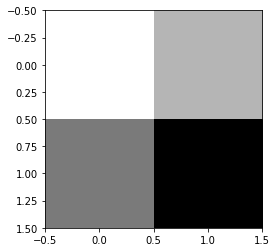

In [2]:
# [Max Pooling Layer]

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

def Visualize(image, x, y):
    plt.imshow(np.reshape(image, (x, y)), cmap ='Greys')
    plt.show()
    
# 임의의 3 x 3 x 1 영상을 하나 만들어줍니다. #의미있는 숫자를 넣어서 연습해보기 ex. 1모양이라던지...
image = tf.constant([[[[1],[2],[3],[4]],
                   [[4],[5],[6],[7]],
                   [[7],[8],[9],[10]],
                   [[3],[5],[7],[9]]]], dtype = np.float32)
# Max Pooling Layer를 선언해보세요.
pool = keras.layers.MaxPool2D(pool_size=(2,2),strides=2, padding="VALID")(image)

print(pool.shape)
print(pool.numpy())

# 원본 영상과 Max Pooling 후 영상을 출력해보세요.
# Image
Visualize(image, 4 ,4)
# Pool
Visualize(pool.numpy(), 2,2)


### Keras로 CNN 구현하기
 
#### MNIST Dataset
 
MNIST 데이터는 0 ~ 9까지의 손글씨 이미지로 구성되어 있으며 데이터의 Label은 0 ~ 9의 정수로 이루어져 있다.

MNIST 데이터를 이용해 CNN을 학습시키고 분류하는 관찰 실습을 진행해보자.
 
#### keras CNN
   
- keras.layers.Conv2D(filters, kernel_size, activation, padding)
    - filters : Output filter 개수
    - kernel_size : Weight Kernel 크기
    - activation : 활성화 함수
    - padding : ‘SAME’ or ‘VALID’
  
- keras.layers.MaxPool2D(padding='SAME')
 
     - padding : ‘SAME’ or ‘VALID’
 
- keras.layers.Flatten() : Conv Layer의 결과는 N-dim의 텐서형태입니다. 이를 1차원으로 평평하게 만들어줍니다.
 
- keras.layers.Dense(node, activation)
    - node : 뉴런 개수
    - activation : 활성화 함수
--- 
관련 링크 :https://keras.io/models/sequential/

---


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

Test Loss : 0.0132 | Test Accuracy : 0.9739000201225281
Test Data로 예측한 클래스 :  [7 2 1 ... 4 5 6]


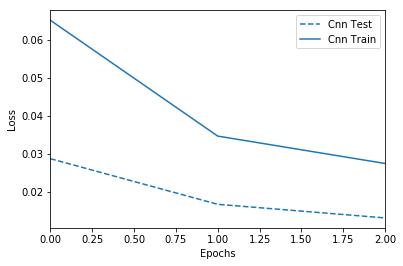

In [3]:
# [Keras로 CNN 구현하기]

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

def Visulaize(histories, key='loss'):
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Test')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])    
    plt.show()
    

# MNIST 데이터 세트를 불러옵니다.
mnist = keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

#MNIST 데이터 이미지를 0~1사이 값으로 정규화해줍니다.
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# 입력 Shape을 맞춰주기 위해 맨 끝에 1차원 Dimension을 하나 추가해줍니다.
# [Num of data, Width, Height] ---->> [Num of data, Width, Height, Channel]
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# 0 ~ 9 사이 값인 Label을 클래스화 하기 위해 One-Hot Encoding을 진행합니다.
# ex 1 ---> [0,0,0,0,0,0,0,0,0,1], 2 ----> [0,0,0,0,0,0,0,0,1,0] ...
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# CNN 모델을 만들어줍니다.
def CNN():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

# model에 CNN 모델을 넣고 모델이 어떻게 생겼는지 확인해보세요..
model = CNN()
model.summary()

# 모델을 학습할 방법과 Error 계산 방법, 평가 방법을 설정합니다.
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# 모델을 학습시켜줍니다.
# verbose의 값에 따라 출력 형태를 바꿀 수 있습니다.
# 0 : silent, 1 : progress bar, 2 : one line per epoch
history = model.fit(train_images, train_labels, epochs = 3, batch_size = 500, validation_data = (test_images, test_labels), verbose = 2)

# 테스트 데이터로 모델을 검증합니다.
loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('Test Data로 예측한 클래스 : ',model.predict_classes(test_images))

# loss와 accuracy를 시각화할 수 있습니다.
Visulaize([('CNN', history)], 'loss')

